# **Clean and Preprocess the Text**

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

text = open('/content/drive/MyDrive/Data_Visualization/NPL Semantic Analysis/Alice.txt', 'r').read()  # Replace with actual text loading if needed
text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


'*** START OF THE PROJECT GUTENBERG EBOOK 11 ***\n\n[Illustration]\n\n\n\n\nAlice’s Adventures in Wonderland\n\nby Lewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\nContents\n\n CHAPTER I.     Down the Rabbit-Hole\n CHAPTER II.    The Pool of Tears\n CHAPTER III.   A Caucus-Race and a Long Tale\n CHAPTER IV.    The Rabbit Sends in a Little Bill\n CHAPTER V.     Advice from a Caterpillar\n CHAPTER VI.    Pig and Pepper\n CHAPTER VII.   A Mad Tea-Party\n CHAPTER VIII.  The Queen’s Croquet-Ground\n CHAPTER IX.    The Mock Turtle’s Story\n CHAPTER X.     The Lobster Quadrille\n CHAPTER XI.    Who Stole the Tarts?\n CHAPTER XII.   Alice’s Evidence\n\n\n\n\nCHAPTER I.\nDown the Rabbit-Hole\n\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into\nthe book her sister was reading, but it had no pictures or\nconversations in it, “and what is the use of a book,” thought Alice\n“without pictures or conver

In [5]:
start_marker = "CHAPTER I."
end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK 11 ***"
start_idx = text.find(start_marker)
end_idx = text.find(end_marker)
clean_text = text[start_idx:end_idx]

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if word.isalpha()]
    return tokens

tokens = preprocess_text(clean_text)
tokens

['chapter',
 'rabbithole',
 'chapter',
 'ii',
 'pool',
 'tears',
 'chapter',
 'iii',
 'caucusrace',
 'long',
 'tale',
 'chapter',
 'iv',
 'rabbit',
 'sends',
 'little',
 'bill',
 'chapter',
 'v',
 'advice',
 'caterpillar',
 'chapter',
 'vi',
 'pig',
 'pepper',
 'chapter',
 'vii',
 'mad',
 'teaparty',
 'chapter',
 'viii',
 'queen',
 'croquetground',
 'chapter',
 'ix',
 'mock',
 'turtle',
 'story',
 'chapter',
 'x',
 'lobster',
 'quadrille',
 'chapter',
 'xi',
 'stole',
 'tarts',
 'chapter',
 'xii',
 'alice',
 'evidence',
 'chapter',
 'rabbithole',
 'alice',
 'beginning',
 'get',
 'tired',
 'sitting',
 'sister',
 'bank',
 'nothing',
 'twice',
 'peeped',
 'book',
 'sister',
 'reading',
 'pictures',
 'conversations',
 'use',
 'book',
 'thought',
 'alice',
 'without',
 'pictures',
 'conversations',
 'considering',
 'mind',
 'well',
 'could',
 'hot',
 'day',
 'made',
 'feel',
 'sleepy',
 'stupid',
 'whether',
 'pleasure',
 'making',
 'daisychain',
 'would',
 'worth',
 'trouble',
 'getting',


# **Visualize Word Frequencies**

## Word Cloud

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

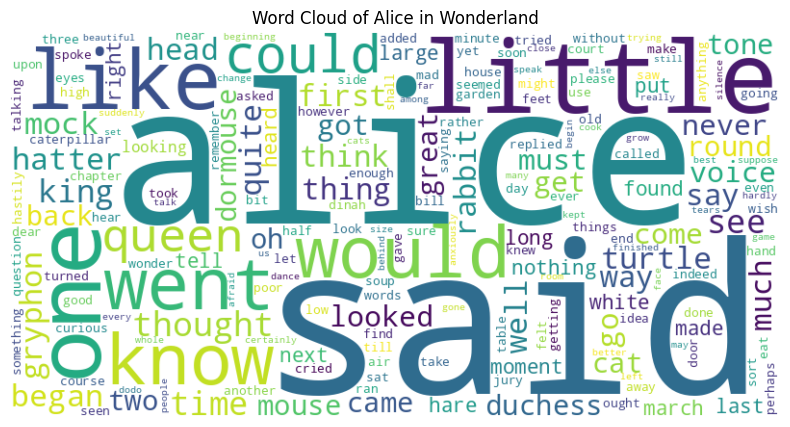

In [7]:
word_counts = Counter(tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Alice in Wonderland')
plt.show()

## Bar Chart

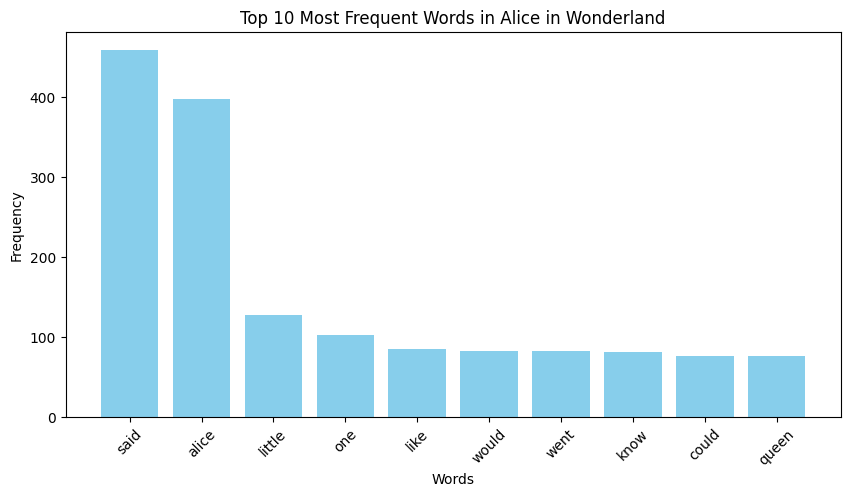

In [8]:
most_common = word_counts.most_common(10)
words, counts = zip(*most_common)

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Alice in Wonderland')
plt.xticks(rotation=45)
plt.show()

# **Plot Semantic Word Relationships Using GloVe Embeddings and PCA**

In [9]:
!pip install numpy==1.24.3
!pip install --upgrade gensim
import numpy as np
from sklearn.decomposition import PCA
import gensim.downloader as api


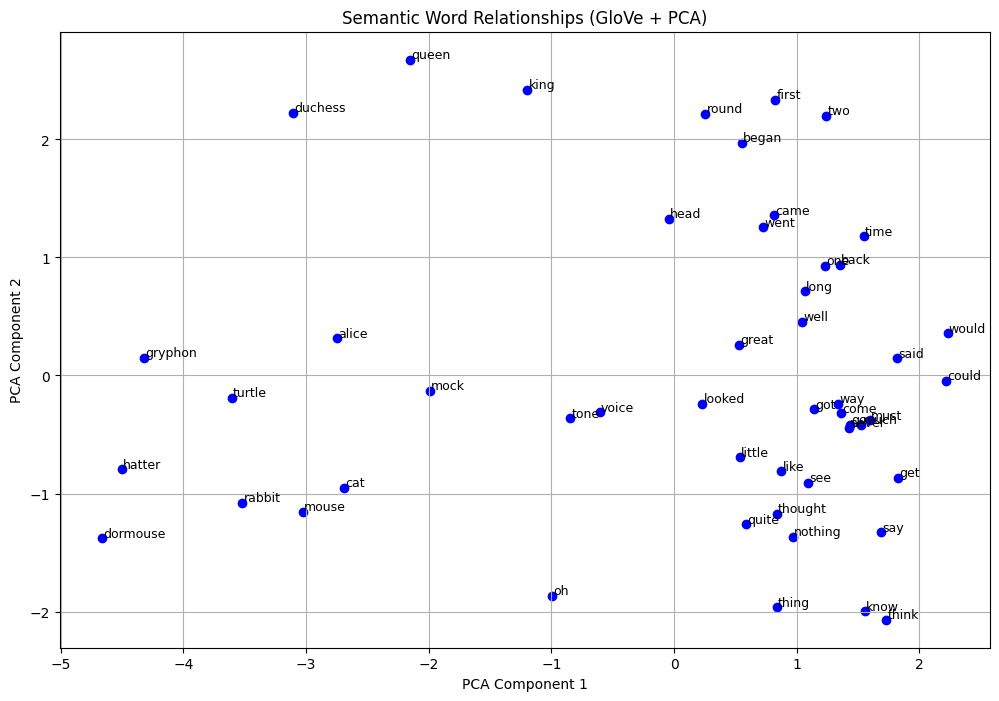

In [10]:
glove_model = api.load("glove-wiki-gigaword-100")

top_words = [word for word, _ in word_counts.most_common(50) if word in glove_model]

embeddings = np.array([glove_model[word] for word in top_words])

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(12, 8))
for i, word in enumerate(top_words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], color='blue')
    plt.text(reduced_embeddings[i, 0] + 0.01, reduced_embeddings[i, 1] + 0.01, word, fontsize=9)
plt.title('Semantic Word Relationships (GloVe + PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# **Display Word Similarities Using a Heatmap**

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

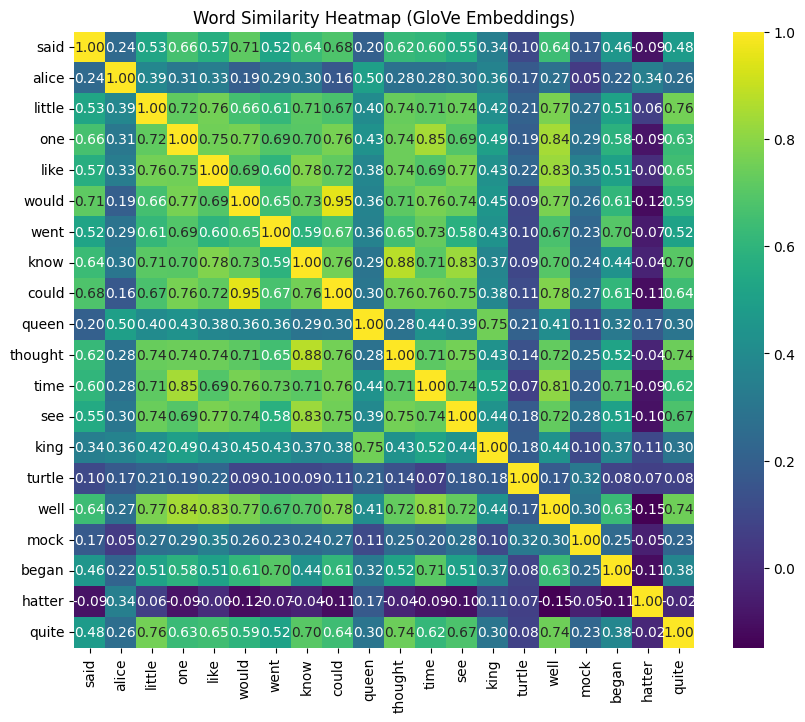

In [13]:
heatmap_words = [word for word, _ in word_counts.most_common(20) if word in glove_model]

heatmap_embeddings = np.array([glove_model[word] for word in heatmap_words])

similarity_matrix = cosine_similarity(heatmap_embeddings)

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=heatmap_words, yticklabels=heatmap_words, cmap='viridis', annot=True, fmt='.2f')
plt.title('Word Similarity Heatmap (GloVe Embeddings)')
plt.show()